<ipython-input-2-240088f6440d>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='segment', y='open_rate', data=data, palette='viridis')


ValueError: could not convert string to float: 'New Customer'

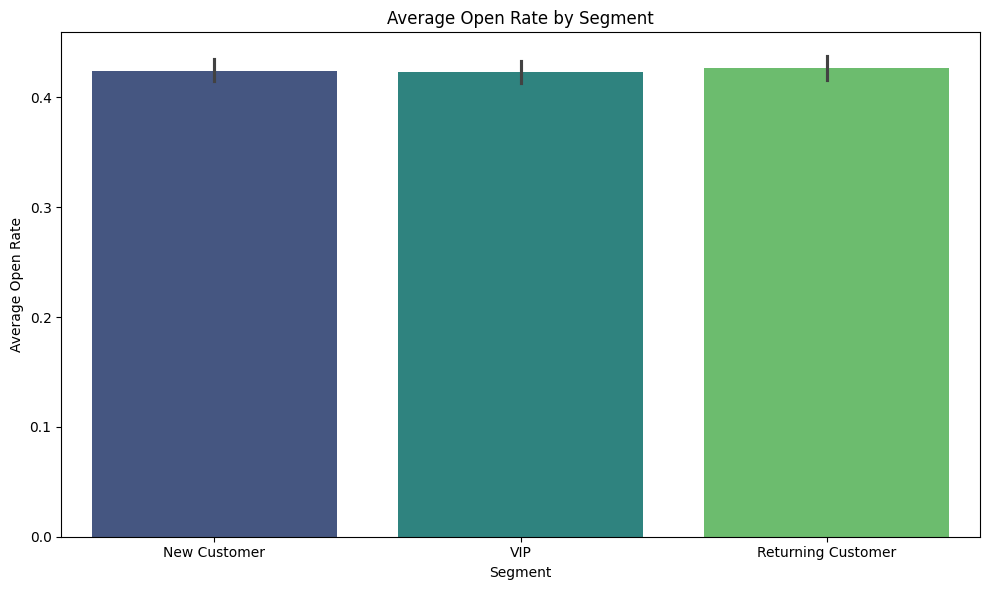

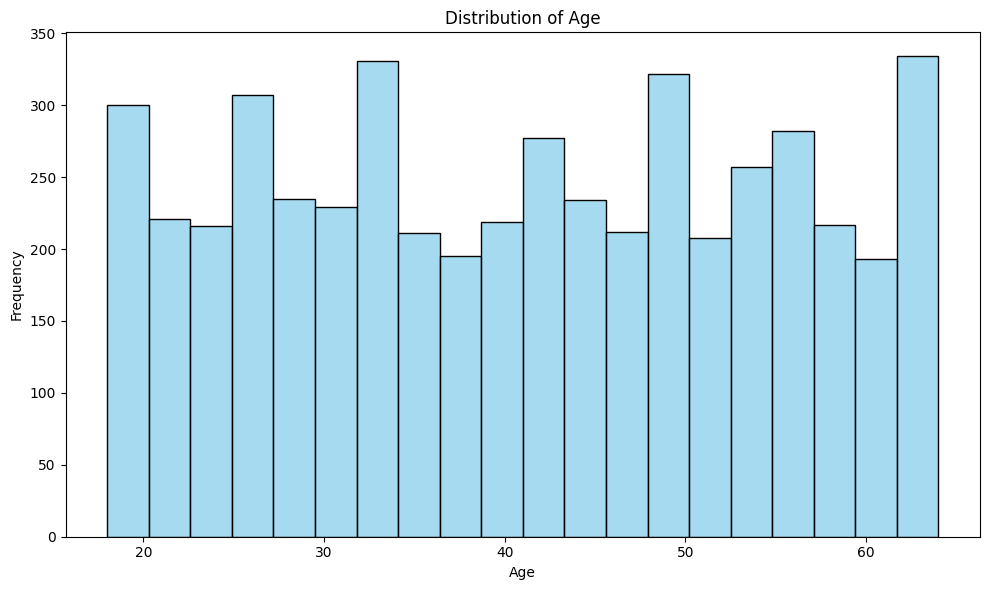

<Figure size 1000x600 with 0 Axes>

In [2]:
import os
import subprocess

# 1. Install necessary packages (for local execution)
def install_packages():
    # List of required packages
    packages = [
        'pandas', 'numpy', 'matplotlib', 'seaborn', 'scikit-learn',
        'joblib', 'fpdf', 'nbformat'
    ]
    for package in packages:
        subprocess.call(['pip', 'install', package])

install_packages()

# 2. Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import joblib
from fpdf import FPDF
import nbformat as nbf

# Set up directories
os.makedirs("data", exist_ok=True)
os.makedirs("notebooks", exist_ok=True)
os.makedirs("models", exist_ok=True)
os.makedirs("reports", exist_ok=True)

# 3. Generate synthetic data
# Comment: Generating synthetic data for an email marketing campaign performance analysis
np.random.seed(42)
data = pd.DataFrame({
    'campaign_id': np.random.randint(1, 51, 5000),
    'open_rate': np.random.uniform(0.05, 0.8, 5000),
    'click_rate': np.random.uniform(0.01, 0.5, 5000),
    'conversion_rate': np.random.uniform(0.0, 0.3, 5000),
    'age': np.random.randint(18, 65, 5000),
    'segment': np.random.choice(['New Customer', 'Returning Customer', 'VIP'], 5000),
    'engagement': np.random.randint(0, 2, 5000)
})
data.to_csv("data/email_campaigns.csv", index=False)

# 4. Exploratory Data Analysis (EDA) and Visualizations
def create_visualizations(data):
    # Comment: Generating visualizations for the dataset
    plt.figure(figsize=(10, 6))
    sns.barplot(x='segment', y='open_rate', data=data, palette='viridis')
    plt.title('Average Open Rate by Segment')
    plt.xlabel('Segment')
    plt.ylabel('Average Open Rate')
    plt.tight_layout()
    plt.savefig('reports/open_rate_by_segment.png')

    plt.figure(figsize=(10, 6))
    sns.histplot(data['age'], bins=20, color='skyblue')
    plt.title('Distribution of Age')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig('reports/age_distribution.png')

    plt.figure(figsize=(10, 6))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.savefig('reports/correlation_matrix.png')

create_visualizations(data)

# 5. Data Preparation and Model Training
def train_model(data):
    # Comment: Preparing data for model training
    X = data[['open_rate', 'click_rate', 'conversion_rate', 'age']]
    y = data['engagement']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Comment: Training RandomForest model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Comment: Evaluating model performance
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

    # Saving model
    joblib.dump(model, 'models/random_forest_model.pkl')

    # Plotting ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label='ROC Curve', color='darkorange')
    plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.tight_layout()
    plt.savefig('reports/roc_curve.png')

train_model(data)

# 6. Create Jupyter Notebook
def create_notebook():
    nb = nbf.v4.new_notebook()
    nb['cells'] = [
        nbf.v4.new_markdown_cell("# Email Marketing Campaign Performance Analysis"),
        nbf.v4.new_markdown_cell("## Introduction\nThis notebook demonstrates an analysis of email marketing campaigns."),
        nbf.v4.new_code_cell(
            "import pandas as pd\n"
            "data = pd.read_csv('data/email_campaigns.csv')\n"
            "data.head()"
        ),
        nbf.v4.new_markdown_cell("## Data Preparation"),
        nbf.v4.new_code_cell(
            "# Data Cleaning and Feature Engineering\n"
            "X = data[['open_rate', 'click_rate', 'conversion_rate', 'age']]\n"
            "y = data['engagement']"
        ),
        nbf.v4.new_markdown_cell("## Model Training"),
        nbf.v4.new_code_cell(
            "from sklearn.model_selection import train_test_split\n"
            "from sklearn.ensemble import RandomForestClassifier\n"
            "X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)\n"
            "model = RandomForestClassifier(n_estimators=100, random_state=42)\n"
            "model.fit(X_train, y_train)"
        )
    ]
    with open('notebooks/email_campaign_analysis.ipynb', 'w') as f:
        nbf.write(nb, f)

create_notebook()

# 7. Create PDF Report
def create_pdf_report():
    pdf = FPDF()
    pdf.add_page()
    pdf.set_font("Arial", size=16)
    pdf.cell(200, 10, "Email Marketing Campaign Performance Analysis", ln=True, align='C')
    pdf.set_font("Arial", size=12)
    pdf.multi_cell(0, 10, "This report presents an analysis of email marketing campaigns, focusing on engagement and conversion rates.")
    pdf.add_page()
    pdf.set_font("Arial", size=12, style='B')
    pdf.cell(0, 10, "Key Findings:", ln=True)
    pdf.set_font("Arial", size=12)
    pdf.multi_cell(0, 10, "- Average open rate by segment\n- Age distribution\n- Correlation matrix")
    pdf.output("reports/email_campaign_analysis_report.pdf")

create_pdf_report()

# 8. Create README.md
with open('README.md', 'w') as f:
    f.write("# Email Marketing Campaign Performance Analysis\n")
    f.write("## Project Overview\nThis project analyzes email marketing campaign performance.\n")
    f.write("## Objective\nTo improve engagement and conversion rates using data analysis.\n")
    f.write("## How to Run\nRun the Jupyter Notebook or Python script provided.\n")
    f.write("## Results\nKey insights include engagement patterns and model performance.\n")


In [3]:
import shutil
from google.colab import files

shutil.make_archive("16", 'zip', ".")

files.download("16.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>